In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('homesensors_2021.csv')
df.head(10)

,pitime,elec_0_avg,elec_1_avg,elec_2_avg,elec_3_avg,elec_6_avg,flow2,flow3,rh_1,rh_2,...,adc_65_avg,adc_66_avg,adc_67_avg,adc_68_avg,adc_69_avg,trpin_47_sampleson,trpin_43_sampleson,trpin_38_sampleson,trpin_40_sampleson,trpin_44_sampleson
0,2021-01-02 00:00:00,0.00,43.97,82.21,53.93,99.93,0.0,0.0,34.75,48.54,...,131.00,199.45,514.97,503.14,511.97,0.00,0.00,0.00,0.00,1.00
1,2021-01-02 00:30:00,0.00,37.28,67.34,49.21,100.28,0.0,0.0,34.63,48.48,...,131.21,200.10,514.93,503.10,511.97,0.00,0.00,0.00,0.00,0.00
2,2021-01-02 01:00:00,89.10,37.03,74.17,65.90,93.00,0.0,0.0,34.36,48.31,...,129.66,198.83,514.90,503.00,512.00,0.00,0.00,0.00,0.00,0.00
3,2021-01-02 01:30:00,0.00,37.38,52.10,47.93,140.69,0.0,0.0,34.51,48.33,...,127.55,196.41,514.86,503.00,512.00,0.00,0.00,0.00,0.00,0.00
4,2021-01-02 02:00:00,0.00,37.07,45.79,47.45,139.07,0.0,0.0,34.50,48.45,...,129.14,202.41,514.97,503.03,511.97,0.00,0.00,0.45,4.10,2.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17467,2021-12-31 21:30:00,91.72,45.83,105.10,65.00,10.03,0.0,0.0,33.21,47.52,...,151.48,224.07,512.97,503.24,510.86,0.00,0.00,0.00,0.00,0.00
17468,2021-12-31 22:00:00,0.00,40.24,79.93,46.03,88.79,0.0,0.0,34.06,48.06,...,153.03,220.52,513.00,503.03,510.90,28.48,5.55,0.00,2.03,0.00
17469,2021-12-31 22:30:00,89.41,36.72,91.31,48.45,9.52,0.0,0.0,34.31,48.41,...,139.17,199.97,513.00,503.07,510.93,0.00,0.00,0.00,0.00,0.00
17470,2021-12-31 23:00:00,0.00,36.90,72.90,24.48,9.93,0.0,0.0,35.00,48.71,...,121.66,168.76,512.86,503.14,510.59,0.00,0.00,0.00,0.00,0.00


In [4]:
df.dropna()

,pitime,elec_0_avg,elec_1_avg,elec_2_avg,elec_3_avg,elec_6_avg,flow2,flow3,rh_1,rh_2,...,adc_65_avg,adc_66_avg,adc_67_avg,adc_68_avg,adc_69_avg,trpin_47_sampleson,trpin_43_sampleson,trpin_38_sampleson,trpin_40_sampleson,trpin_44_sampleson


In [6]:
df2 = df.filter(['pitime', 'temp_8'])
df2.head(10)

,pitime,temp_8
0,2021-01-02 00:00:00,27.32
1,2021-01-02 00:30:00,27.45
2,2021-01-02 01:00:00,27.62
3,2021-01-02 01:30:00,27.57
4,2021-01-02 02:00:00,27.68
5,2021-01-02 02:30:00,27.69
6,2021-01-02 03:00:00,27.69
7,2021-01-02 03:30:00,27.68
8,2021-01-02 04:00:00,27.51
9,2021-01-02 04:30:00,27.06


In [11]:
temp_avg_a = []
c = 0
sum = 0 

for index, row in df2.iterrows():
    if c!= 48: 
        sum = sum + row['temp_8']
        c = c + 1
    elif c==48: 
        result = sum/48
        sum = 0
        c = 0 
        temp_avg_a.append(result)


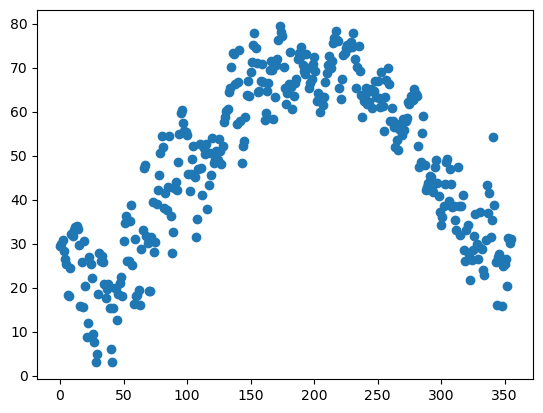

In [14]:
# - draw a scatter plot of outside temperature over the entire year
# I have used 48 row window to extract the average of month and plotted using matplotlib. 
#print(len(temp_avg_a))
plt.scatter(x =range(0,356), y = temp_avg_a)
plt.show()

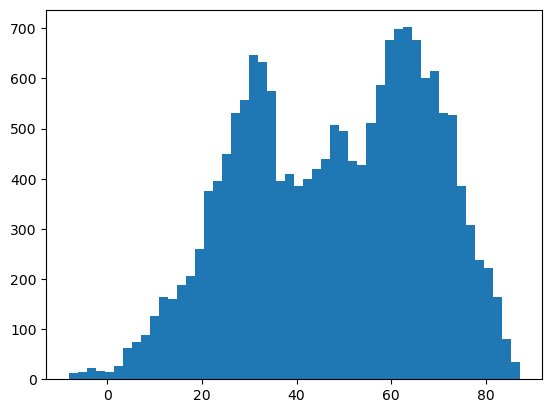

In [15]:
#- draw a histogram of temperature binned into 50 bins over the whole year
plt.hist(df['temp_8'], bins= 50)
plt.show()

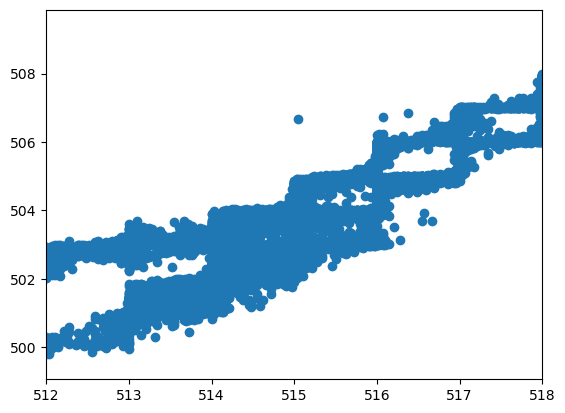

In [18]:
#- draw a scatter plot of 'adc_67_avg' as x and 'adc_68_avg' as y, with an x range of 512-518
plt.scatter(df['adc_67_avg'], df['adc_68_avg'])
plt.xlim(512, 518)
plt.show()
#- what might cause the stepping pattern in the relationship?
# the stepping pattern might be the cause of liquid body in the basement that is causing increase in the moisture or
# there might be some pip leakage 

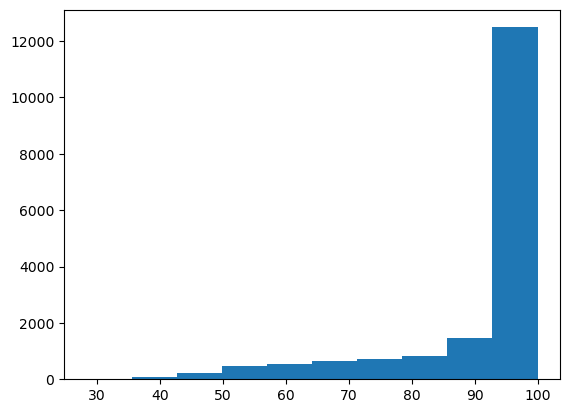

In [19]:
# - draw a histogram of the outdoor relative humidity.
plt.hist(df['rh_3'], bins=10)
plt.show()
#- is the distribution normal?  what might bias this measurement?
# no the distribution is not normal and
# the biasness is due temperature change in outside as the temperature changes and we move from spring to winter season the humidity level increases

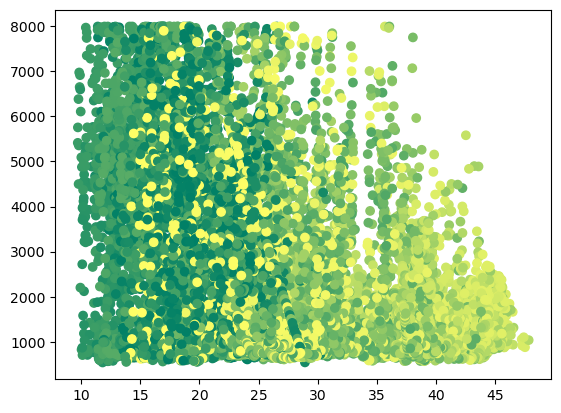

In [21]:
#- draw a scatter plot of rh_4 to co2 colored by temp_8.  Use the 'summer' cmap
plt.scatter(df['rh_4'], df['co2'], c = pd.factorize(df['temp_8'])[0])
plt.summer()
plt.show()

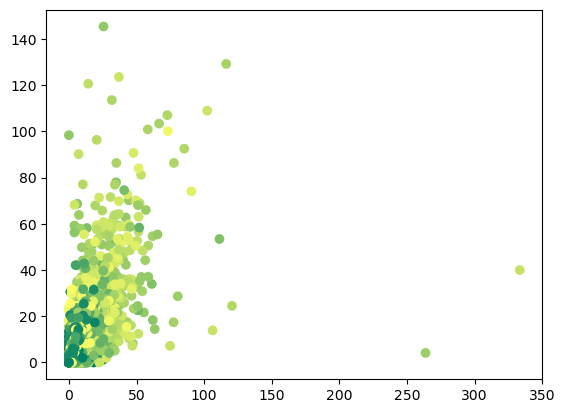

In [23]:
#- draw a scatter plot of 'motion front yard right' and 'motion front yard left'.  use outside temperature as you color
plt.scatter(df['trpin_40_sampleson'], df['trpin_44_sampleson'], c = pd.factorize(df['temp_8'])[0])
plt.show()
#- what does the color tell us about the a bias in the data?
# the scatter plot color is in accordance with the outside temperature which create biasness in the data
# for the period of time where temperature is in certain range the motion sensors are triggered. 
#Colors help in visulization that the events are triggered in at certain temperature - season. 